# EDA dla azjatyckich tekstów religijnych
Dane pochodzą z projektu "Project Gutenberg", lecz zostały wcześniej przetworzone. Czyszczenie danych przeprowadzili **PREETI SAH i ERNEST FOKOUE w (2019) "WHAT DO ASIAN RELIGIONS HAVE IN COMMON? AN UNSUPERVISED TEXT ANALYTICS EXPLORATION"**. Analiza tekstu może nam odpowiedzieć na to jak podobne są do siebie te treści, a z drugiej strony jak specyficznego języka mogą używać różne kultury. Ciekawe czy uda się za pomocą metod uczenia bez nadzoru przyporządkować korpusy do pozycji literackich, z których pochodzą. Zbiór korpusów pochodzi z 8 tekstów.

1.Hinduism (India): Yogasutras, Upanishads   
2.Buddhism (Tibet): Four Noble Truth of Buddhism         
3.Taoism (China): Tao Te Ching                
4.Christianity (Central Asia/America): Book of Proverb, Book of Ecclesiastes, Book of Ec-clesiasticus, Book of Wisdom 

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats
import sklearn
import re
import nltk
from sklearn import cluster,mixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn import metrics

In [114]:
#df=pd.read_csv("C:\\Users\\huber\\Dropbox\\PW\\2 SEMESTR\\Wstep do uczenia maszynowego\\AllBooks_baseline_DTM_Unlabelled.csv")
df = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\Wstęp do uczenia maszynowego\\Dane\\AllBooks_baseline_DTM_Unlabelled.csv")

In [115]:
df = df.drop(index=13).reset_index(drop=True)

In [116]:
df.head(15)

,# foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Columns: 8266 entries, # foolishness to explains
dtypes: float64(8266)
memory usage: 37.1 MB


In [118]:
df.describe()

,# foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,...,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,0.003396,0.567063,0.006791,0.001698,0.032258,0.059423,0.001698,0.001698,0.006791,0.001698,...,0.003396,0.006791,0.003396,0.001698,0.001698,0.001698,0.079796,0.008489,0.005093,0.003396
std,0.058222,1.778844,0.082198,0.041204,0.488624,0.327119,0.041204,0.041204,0.082198,0.041204,...,0.058222,0.100786,0.058222,0.041204,0.041204,0.041204,0.367121,0.091822,0.071246,0.058222
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,14.000000,1.000000,1.000000,11.000000,4.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000


Można zauważyć, że mamy tutaj problem przekleństwa wymiarowości. Mamy do czynienia z macierzą o wymiarach 590 na 8266, na dodatek jest to macierz rzadka, to jest pełna zer. Kolumny stanowią indykatory zliczające wystąpienie danego słowa w korpusie. Każdy jeden fragment korpusu jest obserwacją. Zobaczmy czy jakieś charakterystyczne słowa występują najczęściej w tych tekstach.

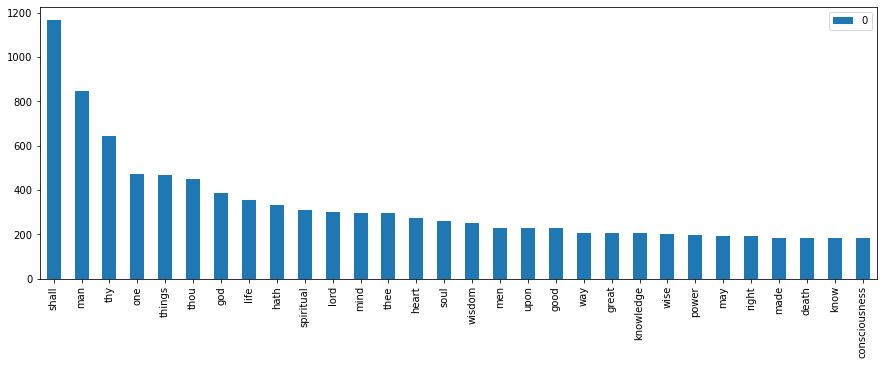

In [119]:
Names=pd.DataFrame(df.sum(axis=0))
#Names.index.name = 'newhead'
#Names.reset_index(inplace=True)
#Names.sort_values(by=0, ascending=False).iloc[0:30,]
#Names.columns=["Name", "Times"]
Names.sort_values(by=0, ascending=False).iloc[0:30,].plot(kind="bar", figsize=(15,5))
plt.show()

Jak widzimy niektóre pojawiają się naprawdę często, nie są one jednak na pierwszy rzut oka charakterystyczne dla jakichkolwiek tekstów. Może być jednak tak, że okaże się zupełnie co innego, bo tylko część z ksiąg będzie używała składni do której będą wymagane niektóre z tych słów. Przyjrzyjmy się z kolei tym rzadziej występującym słowom, będziemy tutaj szukać czy da się tutaj jakoś zmniejszyć wymiar naszych danych przez usunięcie słów, które występują bardzo rzadko albo w ogóle.

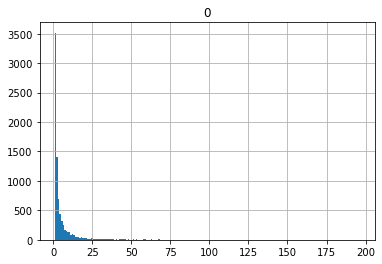

In [120]:
Names[Names<200].hist(bins=200)
plt.show()

In [121]:
Names.describe()

,0
count,8266.000000
mean,7.332325
std,27.331082
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,1168.000000


Jest bardzo dużo słów, które rzadko występują, ponad 50% z nich występuje 2 razy lub rzadziej. Takie kolumny będą dobrymi kandydatami do usunięcia, gdyż nie powinny wnosić nam dużo do modelu.

Sprawdźmy teraz jak mają się do siebie sumy użytych słów w poszczególnych księgach. Chcielibyśmy aby były one mniej więcej podobne, gdyż w przypadku dużych różnic w długościach algorytmy klasteryzacji mogą uznawać po prostu długie książki za podobne do siebie, mimo tego, że byłyby zupełnie inne.

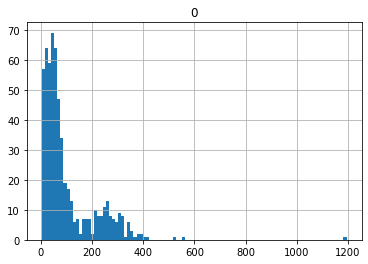

In [122]:
Books=pd.DataFrame(df.sum(axis=1))
#Names1.sort_values(by=0, ascending=False)[1:50]
Books.hist(bins=100)
plt.show()

Książki różnią się ilością zawieranych słów, jednak znaczna większość jest w przedziale 0-200. Powyżej 400 słów jest bardzo niewiele obserwacji.

### Orginalny plik tekstowy
Pozwoliliśmy sobie na rzucenie okiem także na orginalny plik tekstowy, w następnych krokach rysujemy ładnie wyglądającą mapę wyrazów najczęściej się pojawiających i przykładamy do owego tekstu dwa narzędzia rodem z NLP to jest wskaźnik ***subjectivity*** i ***polarity***.

In [123]:
#TT = open('C:\\Users\\huber\\Dropbox\\PW\\2 SEMESTR\\Wstep do uczenia maszynowego\\Complete_data.txt', 'r')
TT = open('C:\\Users\\Lenovo\\Desktop\\Wstęp do uczenia maszynowego\\Dane\\Complete_data.txt', 'r')
TXT = TT.read()
TT.close()

In [124]:
DF = re.split('\d+\.\d+', TXT)
DF1=pd.DataFrame(DF).iloc[1:592, ]
DF1=DF1.rename(columns={0:"txt"})
DF1

,txt
1,"\nÂ§ 1.The Buddha: ""What do you think, Rahula:..."
2,\nÂ§ 2.Once the Blessed One was staying at Kos...
3,"\nÂ§ 3.""'Stress should be known. The cause by ..."
4,"\nÂ§ 4.""Vision arose, clear knowing arose, dis..."
5,"\nÂ§ 5.Sariputta: ""There are these three forms..."
...,...
587,"\n 14:1. Again, another designing to sail, and..."
588,\ncondemning both the makers and the worshippe...
589,"\nworthily punished, and were destroyed by a m..."
590,"\n 17:1. For thy judgments, O Lord, are great,..."


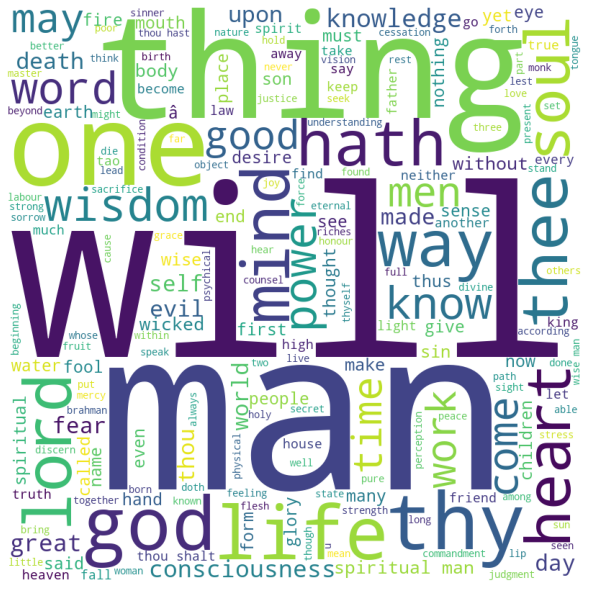

In [125]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
for val in DF:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

Mapa słów najczęściej się pojawiających tym większą czcionkę stosuje im słowo częściej wystepowało w całym korpusie. Na tekst nałożony jest filtr w postaci słownika STOPWORDS, który usuwa wyrazy potencjalnie nie niosące treści. Mając na uwadzę ten fakt możemy też porównać, które słowa zostały uznane przez autorów bazy danych za warte uwzględnienia, a które pominięte (np. "Will" i "Shall").

In [126]:
#pip install textblob
from textblob import TextBlob
DF1['polarity']=DF1.loc[:,'txt'].apply(lambda x:TextBlob(x).sentiment.polarity)
DF1['subjectivity']=DF1.loc[:,'txt'].apply(lambda x:TextBlob(x).sentiment.subjectivity)
DF1

,txt,polarity,subjectivity
1,"\nÂ§ 1.The Buddha: ""What do you think, Rahula:...",-0.059836,0.395902
2,\nÂ§ 2.Once the Blessed One was staying at Kos...,0.117647,0.477941
3,"\nÂ§ 3.""'Stress should be known. The cause by ...",0.180979,0.547078
4,"\nÂ§ 4.""Vision arose, clear knowing arose, dis...",0.343080,0.664732
5,"\nÂ§ 5.Sariputta: ""There are these three forms...",0.000000,0.000000
...,...,...,...
587,"\n 14:1. Again, another designing to sail, and...",0.197806,0.568295
588,\ncondemning both the makers and the worshippe...,0.010802,0.569444
589,"\nworthily punished, and were destroyed by a m...",0.133667,0.569179
590,"\n 17:1. For thy judgments, O Lord, are great,...",-0.076437,0.650194


Ilość korpusów zgadza się z wielkością macierzy. Analiza sentymentu zawiera między innymi dwa wskaźniki **polarity** i **subjectivity**. Polarity wpada w przedział $[-1,1]$, a im niższa wartość tym tekst oceniany jest za bardziej nacechowany negatywnie zaś subjectivity w $[0,1]$, a interpretować należy tę skalę w taki sposób, że wartości bliższe zera powinny wskazywać na mniej nacechowane subiektywnie treści. 

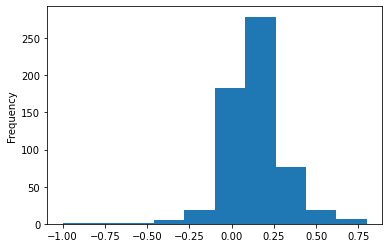

In [127]:
DF1['polarity'].plot(kind = 'hist')
plt.show()

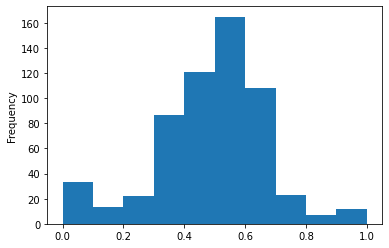

In [128]:
DF1['subjectivity'].plot(kind = 'hist')
plt.show()

Z perspektywy oceny eksperckiej językoznawców teksty uznane zostałyby za bardziej nacechowane pozytywnie, zaś ich subiektywność w dużej częsci za pomiędzy faktem a opinią.

Na zakończenie poczytajmy sobie w celach weryfikacji naszych intuicji teksty o skrajnych wartościach obu współczynników. Niech to będzie nasze słowo na wtorek!

In [129]:
list(DF1.sort_values(by="polarity", ascending=True).iloc[0:3,0])

['\n He who is without discrimination and whose mind is always uncontrolled, his senses are unmanageable, like the vicious horses of a driver.   \n',
 '\n He who knows the three-fold Nachiketa fire and performs the Nachiketa fire-sacrifice with three-fold knowledge, having cast off the fetters of death and being beyond grief, he rejoices in the realm of heaven.   \n',
 '\nseen have not alto fallen away, since they still exist for others.  When one of us conquers hate, hate does not thereby cease out of the world, since others still hate and suffer hatred. So with other delusions, which hold us in bondage to material things, and through which we look at all material things. When the coloured veil of illusion is gone, the world which we saw through it is also gone, for now we see life as it is, in the white radiance of eternity. But for others the coloured veil remains, and therefore the world thus coloured by it remains for them, and will remain till they, too, conquer delusion.  \n']

In [130]:
list(DF1.sort_values(by="polarity", ascending=False).iloc[0:3,0])

['\n Beyond the senses are the objects, beyond the objects is the mind, beyond the mind is the intellect, beyond the intellect is the great Atman.   \n',
 '\n The intelligent man, who has heard and repeated the ancient story of Nachiketas, told by the Ruler of Death, is glorified in the world of Brahman.   \n',
 '\n By the worship of the Unmanifested one end is attained; by the worship of the manifested, another.  Thus we have heard from the wise men who taught us this.   \n']

In [131]:
list(DF1.sort_values(by="subjectivity", ascending=True).iloc[0:3,0])

['\n No mortal lives by the in-coming breath (Prana) or by the out-going breath (Apana), but he lives by another on which these two depend.   \n',
 '\n This Word is indeed Brahman.  This Word is indeed the Supreme. He who knows this Word obtains whatever he desires.   \n',
 '\n He ran towards it and He (Brahman) said to him: "Who art thou?" "I am Agni, I am Jataveda," he (the Fire-god) replied.   \n']

In [132]:
list(DF1.sort_values(by="subjectivity", ascending=False).iloc[0:3,0])

['\n They said to Fire: "O Jataveda (All-knowing)!  Find out what mysterious spirit this is."  He said: "Yes."   \n',
 '\n Yama said: O Brahmana!  Revered guest!  My salutations to thee. As thou hast remained three nights in my house without food, therefore choose three boons, O Brahmana.   \n',
 '\n The Brahman perceived this and appeared before them.  They did not know what mysterious form it was.   \n']

# Feature engineering, baseline model

Naszym głównym celem w tej części będzie redukcja wymiarów oraz dodanie kilku cech przy pomocy NLP na podstawie oryginalnych tekstów. Pierwszym podejściem będzie znalezienie słów, które występują tylko w jednej księdze. Dla każdej księgi policzymy ile takich różnych słów zawiera oraz ile w sumie. Następnie usuniemy te słowa z naszej ramki danych i przeprowadzimy PCA.

In [133]:
Single = df.apply(lambda x:np.sum(x>0)<2)

In [134]:
df1=df.copy()

In [135]:
Number_of_unique = df.apply(lambda x:sum(x[Single]>0),axis=1)
Sum_of_unique = df.apply(lambda x:np.sum(x[Single]),axis=1)

In [136]:
df1 = df1.loc[:,~Single]

In [137]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Columns: 4394 entries, # foolishness to explains
dtypes: float64(4394)
memory usage: 19.7 MB


In [138]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200)
pca.fit(df1.transpose())

PCA(n_components=200)

In [139]:
print(np.sum(pca.explained_variance_ratio_))

0.9147238249265996


In [140]:
df2 = pd.DataFrame(pca.components_).transpose()

In [141]:
df2["Number_of_unique"] = Number_of_unique
df2["Sum_of_unique"] = Sum_of_unique

Teraz zajmiemy się tworzeniem kilku nowych cech na podstawie oryginalnych tekstów.

In [142]:
# Dzielimy tekst aby odtworzyć podział z zadania
raw = re.split('\n\d\.\d+\n', TXT)
raw = [re.sub(r'\d\.\d+\n','',text) for text in raw]

In [143]:
# Zamieniamy na ramke danych
NLP=pd.DataFrame(raw)
NLP=NLP.rename(columns={0:"txt"})
print(NLP)

                                                   txt
0    Â§ 1.The Buddha: "What do you think, Rahula: W...
1    Â§ 2.Once the Blessed One was staying at Kosam...
2    Â§ 3."'Stress should be known. The cause by wh...
3    Â§ 4."Vision arose, clear knowing arose, disce...
4    Â§ 5.Sariputta: "There are these three forms o...
..                                                 ...
585  condemning both the makers and the worshippers...
586  worthily punished, and were destroyed by a mul...
587   17:1. For thy judgments, O Lord, are great, a...
588  intercession, in the sedition on occasion of C...
589  All creatures obey God's orders for the servic...

[590 rows x 1 columns]


In [144]:
NLP=pd.DataFrame(raw)
NLP=NLP.rename(columns={0:"txt"})
# 1) Zmniejszamy do malych liter wszystkie slowa. Czy aby na pewno to nie zmieni interpretacji?
NLP["txt"]=NLP.txt.str.lower()
# 2) Usuwam dziwny symbol, który nie przekazuje zadnej dla nas wartosciowej informacji, a automatycznie identyfikuje księgę
NLP["txt"]=NLP.txt.str.replace('â§','', regex=False)
NLP["txt"]=NLP.txt.str.replace('Â§','', regex=False)
# 3) Usuwam liczby, numery wersetów, które są znowu charakterystyczne dla księgi, ale nic nie informują o treści
NLP["txt"]=NLP.txt.str.replace('\d+:\d+\.','', regex=True)
NLP["txt"]=NLP.txt.str.replace('\d+\.','', regex=True)
NLP["txt"]=NLP.txt.str.replace('\"','', regex=True)

In [145]:
# 14 wiersz jest pusty - usuwamy
NLP["txt"]=NLP.txt.drop(13, axis=0)
NLP = NLP[NLP['txt'].notna()]
NLP=NLP.reset_index(drop=True)
NLP.head(n=14)

,txt
0,"the buddha: what do you think, rahula: what i..."
1,once the blessed one was staying at kosambi i...
2,'stress should be known. the cause by which s...
3,"vision arose, clear knowing arose, discernmen..."
4,sariputta: there are these three forms of str...
5,"sariputta: now what, friends, is the noble tr..."
6,"at savatthi. there the blessed one said, monk..."
7,the buddha: these are the five clinging-aggre...
8,and why do you call it 'form' (rupa)? because...
9,"mahakotthita: feeling, perception, & consciou..."


In [146]:
#pip install textblob
#pip install textstat
import textstat
from textstat import flesch_reading_ease, automated_readability_index
from textblob import TextBlob
NLP['FRE'] = NLP['txt'].apply(lambda x : flesch_reading_ease(x))
NLP['ARI'] = NLP['txt'].apply(lambda x : automated_readability_index(x))
NLP['polarity']=NLP.loc[:,'txt'].apply(lambda x:TextBlob(x).sentiment.polarity)
NLP['subjectivity']=NLP.loc[:,'txt'].apply(lambda x:TextBlob(x).sentiment.subjectivity)

In [147]:
def count_chars(text):
    return len(text)
def count_words(text):
    return len(text.split())
NLP['avg_wordlength'] = NLP.txt.apply(lambda x:count_chars(x))/NLP.txt.apply(lambda x:count_words(x))

In [148]:
NLP.describe()

,FRE,ARI,polarity,subjectivity,avg_wordlength
count,589.000000,589.000000,589.000000,589.000000,589.000000
mean,-138.616265,108.387606,0.136458,0.488328,5.779431
std,226.460543,113.385057,0.169336,0.184413,0.445525
min,-2415.960000,6.900000,-1.000000,0.000000,4.818182
25%,-177.550000,37.500000,0.034886,0.393207,5.473469
50%,-52.700000,64.200000,0.122727,0.511039,5.733333
75%,1.440000,131.700000,0.214286,0.601563,6.000000
max,75.880000,1231.500000,0.800000,1.000000,7.857143


Łączymy nasze nowo utworzone cechy razem z PCA.

In [149]:
df3 = df2.join(NLP.drop(columns=["txt"]))
df3

,0,1,2,3,4,5,6,7,8,9,...,197,198,199,Number_of_unique,Sum_of_unique,FRE,ARI,polarity,subjectivity,avg_wordlength
0,0.003833,0.038132,0.003984,-0.063719,-0.016674,0.019052,-0.059961,0.892728,-0.334115,-0.020402,...,0.006266,-0.006061,0.001301,10,26.0,-524.34,296.3,-0.059836,0.395902,6.013289
1,0.006335,0.006980,-0.000270,-0.043774,-0.032700,0.001528,-0.053323,0.035045,0.143495,0.026372,...,-0.030713,-0.014231,0.026131,8,17.0,-172.13,133.1,0.125000,0.476563,5.667925
2,0.004558,0.031854,-0.002264,-0.110476,-0.161026,0.096090,-0.224201,0.071932,0.434110,0.141761,...,0.035958,0.002977,0.007616,9,9.0,-287.16,186.7,0.180979,0.547078,5.848000
3,0.002283,0.011491,-0.002876,-0.057108,-0.084060,0.043813,-0.117532,0.017583,0.212437,0.014463,...,-0.027403,0.013329,0.015847,4,7.0,-191.08,135.3,0.343080,0.664732,5.834559
4,0.000154,0.000593,0.000390,-0.000542,-0.000440,0.001555,0.000253,0.001245,0.003819,0.001280,...,-0.014131,0.031291,-0.018227,1,5.0,42.04,22.8,0.000000,0.000000,7.310345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,0.046908,-0.002990,0.018291,-0.066399,0.041987,-0.042684,-0.002056,0.005681,-0.010795,0.017688,...,0.005143,0.044721,0.082263,21,21.0,-452.27,269.3,0.010802,0.569444,5.377079
585,0.090726,-0.005471,0.155874,-0.031203,-0.015108,-0.029536,0.018525,-0.000425,-0.008429,-0.071637,...,-0.027776,-0.013738,0.004481,29,32.0,-715.15,400.0,0.133667,0.569179,5.623750
586,0.019573,0.002093,0.016589,-0.040557,-0.009328,-0.048966,0.002838,-0.002498,0.004709,-0.027704,...,0.018737,-0.026767,-0.005673,24,24.0,-450.58,266.1,-0.076437,0.650194,5.755179
587,0.050038,0.005037,0.090937,-0.072713,0.003809,-0.052456,-0.004058,0.002309,-0.004169,0.008003,...,-0.032788,0.011334,0.024196,33,33.0,-667.79,372.6,0.042108,0.597840,5.659060


Widzimy, że nowo dołączone cechy mają znacznie większe wartości od tych zwróconych przez PCA, będziemy chcieli je więc jakoś poprzekszatłcać i przeskalować.

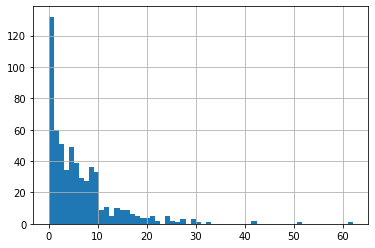

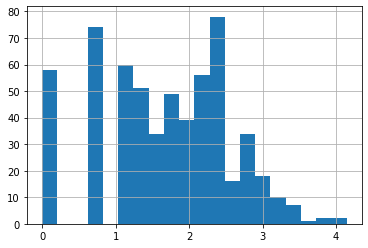

In [150]:
df3.Number_of_unique.hist(bins=60)
plt.show()
np.log(df3.Number_of_unique+1).hist(bins=20)
plt.show()

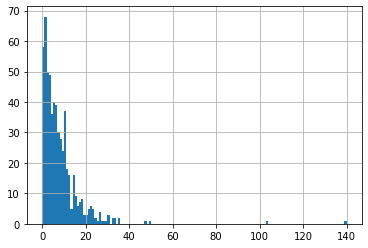

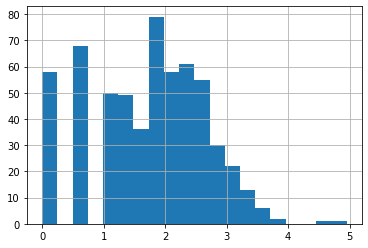

In [151]:
df3.Sum_of_unique.hist(bins=140)
plt.show()
np.log(df3.Sum_of_unique+1).hist(bins=20)
plt.show()

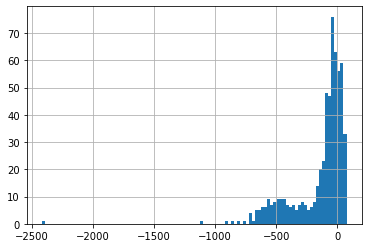

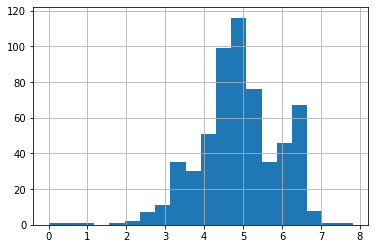

In [152]:
df3.FRE.hist(bins=100)
plt.show()
np.log(-df3.FRE+np.max(df3.FRE)+1).hist(bins=20)
plt.show()

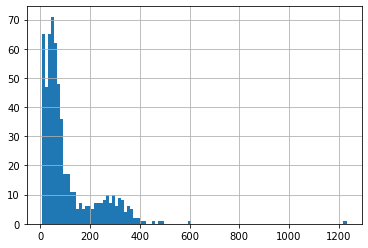

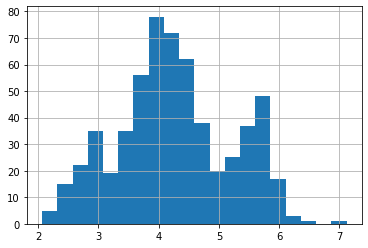

In [153]:
df3.ARI.hist(bins=100)
plt.show()
np.log(df3.ARI+1).hist(bins=20)
plt.show()

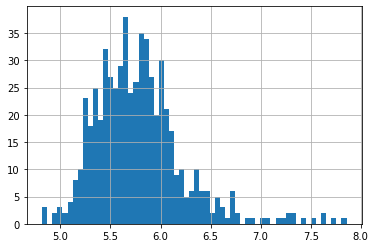

In [154]:
df3.avg_wordlength.hist(bins=60)
plt.show()

Dzięki takim przekształceniom histogramy wyglądają dużo lepiej, a dane możemy wystandaryzować.

In [155]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [156]:
df3.Number_of_unique = scaler.fit_transform(np.array(np.log(df3.Number_of_unique+1)).reshape(-1, 1))
df3.Sum_of_unique = scaler.fit_transform(np.array(np.log(df3.Sum_of_unique+1)).reshape(-1, 1))
df3.FRE = scaler.fit_transform(np.array(np.log(-df3.FRE+np.max(df3.FRE)+1)).reshape(-1, 1))
df3.ARI = scaler.fit_transform(np.array(np.log(df3.ARI+1)).reshape(-1, 1))

Jako podstawowe modele przyjmiemy dwa algorytmy: kmeans oraz kmedoids. Liczbę klastrów spróbujemy wybrać przy pomocy metody łokcia i kodów z zajęć.

## Kmeans

In [157]:
from sklearn.cluster import KMeans

In [158]:
def count_wcss_scores_kmeans(X, k_max):
    #  WCSS = within-cluster sum of squares
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss = kmeans.score(X) * -1 # score returns -WCSS
        scores.append(wcss)
    return scores

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


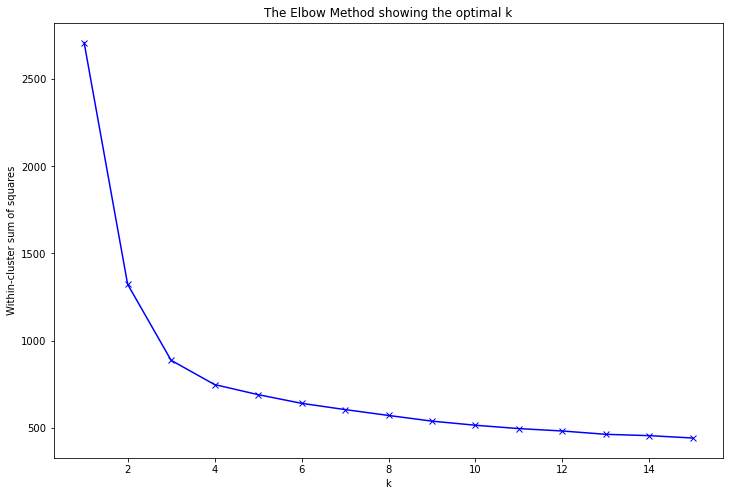

In [159]:
wcss_vec = count_wcss_scores_kmeans(df3, 15)
x_ticks = list(range(1, len(wcss_vec) + 1))
f = plt.figure(figsize=(12,8))
plt.plot(x_ticks, wcss_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Within-cluster sum of squares')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Na razie najbardziej odpowiedni wydaje się być podział na 9 klastrów, gdyż w tym miejscu nasza funkcja ma minimum lokalne. Nie jest to jednak nic wyraźnego, bardziej będzie nas interesowało porównanie innych metod z całym wykresem dla innych metod.

## Kmedoids

In [160]:
from sklearn_extra.cluster import KMedoids

In [161]:
def count_iner_scores_kmedoids(X, k_max):
    scores = []
    for k in range(1, k_max+1):
        kmedoids = KMedoids(n_clusters=k, random_state=0)
        kmedoids.fit(X)
        iner = kmedoids.inertia_
        scores.append(iner)
    return scores

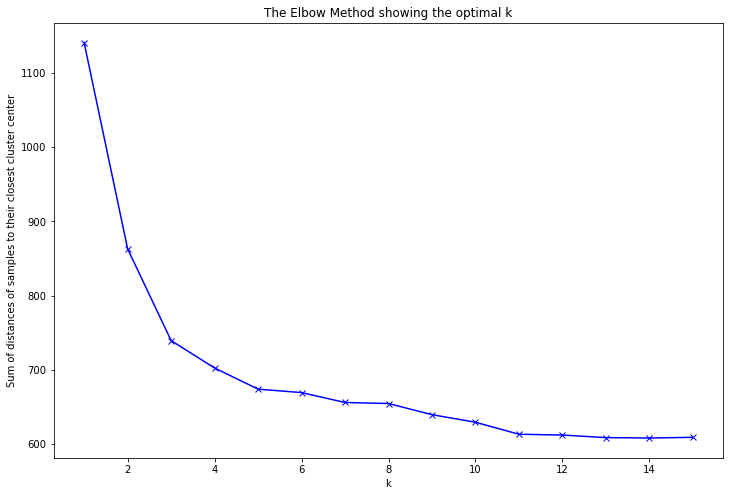

In [162]:
iner_vec = count_iner_scores_kmedoids(df3, 15)
x_ticks = list(range(1, len(iner_vec) + 1))
f = plt.figure(figsize=(12,8))
plt.plot(x_ticks, iner_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of distances of samples to their closest cluster center')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Na podstawie tego wykresu możemy zdecydowanie wybrać k=5, jest tam bardzo dobrze widoczny "łokieć". Nie możemy niestety porównać dobrze kmeans oraz kmedoids, gdyż posługujemy się tu innymi miarami.

# Zaawansowane modele

W tym kroku spróbujemy dopasować kmeans, kmedoids oraz modele aglomeracyjne na naszej ramce danych i ocenić liczbę klastrów na podstawie współczynnika silhouette.

In [163]:
#kod z zajęć
def count_clustering_scores(X, cluster_num, model_class, score_fun):
    # Napiszmy tę funkcje tak ogólnie, jak to możliwe. 
    # Zwróćcie uwagę na przekazanie obiektów typu callable: model i score_fun.
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model_class(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

## KMeans silhouette

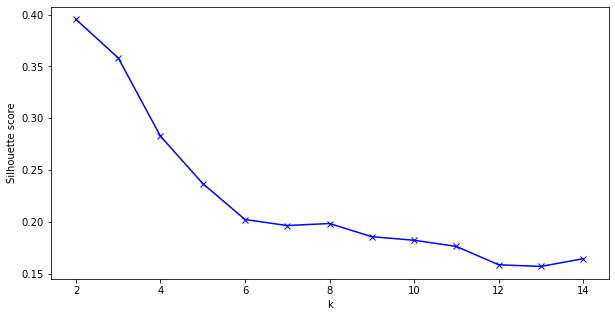

In [164]:
cluster_num_seq = range(2, 15) # Niektóre metryki nie działają gdy mamy tylko jeden klaster
silhouette_vec = count_clustering_scores(df3, cluster_num_seq, KMeans, silhouette_score)
f = plt.figure(figsize=(10,5))
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

## KMedoids silhouette

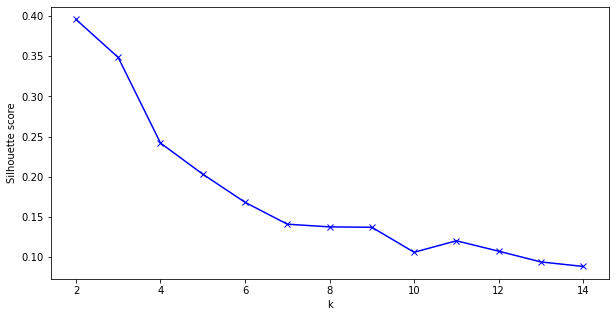

In [165]:
cluster_num_seq = range(2, 15) # Niektóre metryki nie działają gdy mamy tylko jeden klaster
silhouette_vec = count_clustering_scores(df3, cluster_num_seq, KMedoids, silhouette_score)
f = plt.figure(figsize=(10,5))
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

Ciężko tutaj wybrać jakikolwiek model na podstawie silhouette, najbardziej jednak bylibyśmy skłonni wybrać KMeans z k=6.

## Modele aglomeracyjne

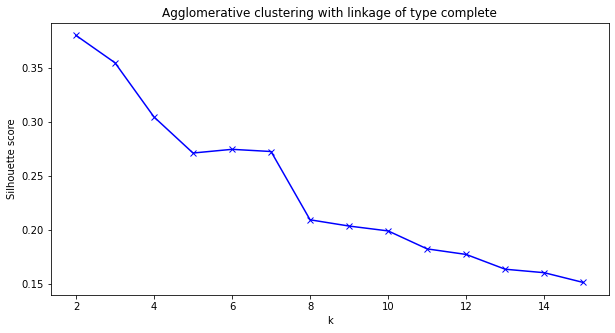

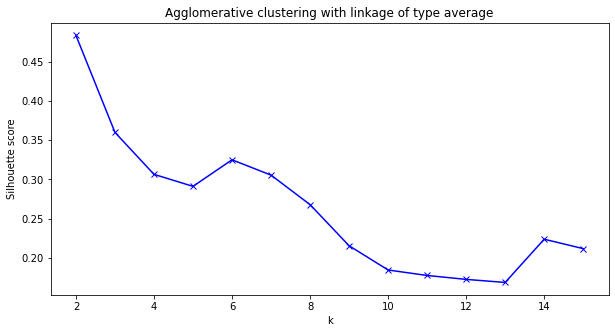

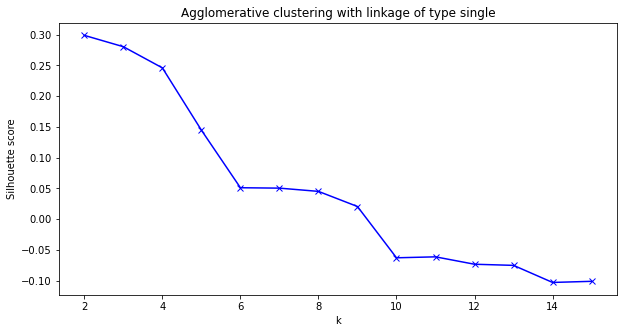

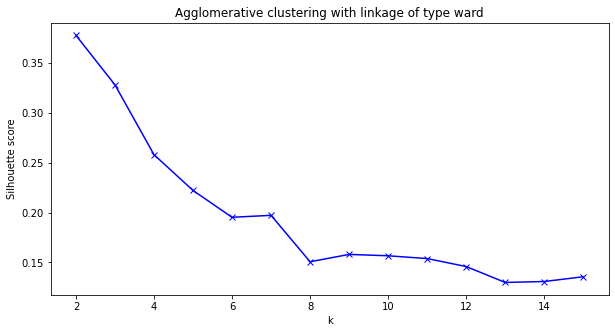

In [166]:
for linkage in {'ward', 'complete', 'average', 'single'}:
    sil_score=[None]*14
    for k in range(2,16):
        classes=AgglomerativeClustering(n_clusters=k,linkage=linkage).fit_predict(df3)
        sil_score[k-2]=silhouette_score(df3,classes)
    f = plt.figure(figsize=(10,5))
    plt.plot(list(range(2,16)),sil_score , 'bx-')
    plt.title("Agglomerative clustering with linkage of type "+linkage)
    plt.xlabel('k')
    plt.ylabel('Silhouette score')
    plt.show()

Tutaj najlepiej prezentuje się model z linkage=average, więc wybierzemy go z k=6.

W tej części spróbujemy do metod aglomeracyjnych zastosować naszą wymyśloną metrykę. Inspiracją do jej stworzenia była większa chęć zaakcentowania różnic na małych liczbach słów. W metryce euklidesowej jeśli w jednej księdze słowo x jest 0 razy a w drugiej 4, natomiast inne słowo w pierwszej księdze jest 48 razy a w drugiej 52, to wpływają one tak samo na odległość między tymi księgami. W nowej metryce pierwsze słowo dodawałoby 1 do metryki natomiast drugie słowo tylko 0.04.

In [167]:
def my_metric2(x,y):
    return np.sum(np.abs(x-y)/(x+y))

In [170]:
pdist2 = np.zeros((589, 589)) 

for i in range(589):
    for j in range(i + 1, 589):
        pdist2[i,j] = my_metric2(df1.iloc[i,:], df1.iloc[j,:])
        pdist2[j,i] = pdist2[i,j]

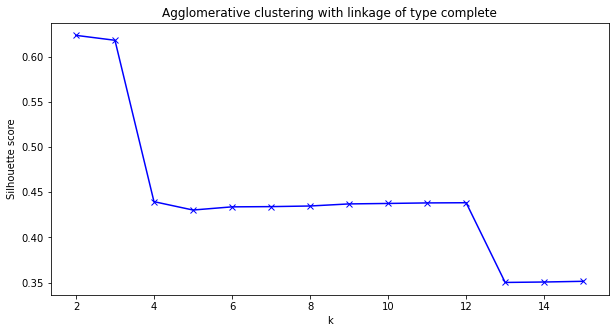

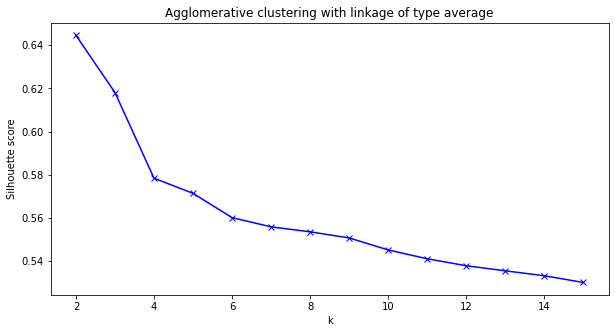

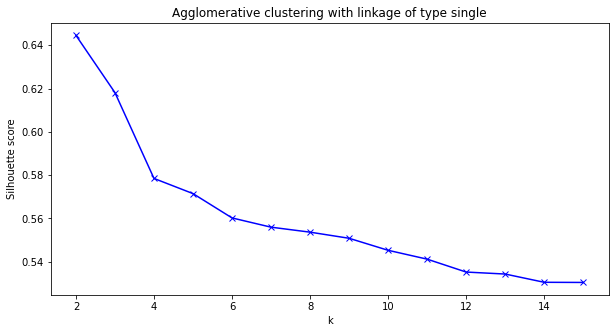

In [171]:
for linkage in {'complete', 'average', 'single'}:
    sil_score=[None]*14
    for k in range(2,16):
        classes=AgglomerativeClustering(n_clusters=k,linkage=linkage,affinity="precomputed").fit_predict(pdist2)
        sil_score[k-2]=silhouette_score(pdist2,classes,metric="precomputed")
    f = plt.figure(figsize=(10,5))
    plt.plot(list(range(2,16)),sil_score , 'bx-')
    plt.title("Agglomerative clustering with linkage of type "+linkage)
    plt.xlabel('k')
    plt.ylabel('Silhouette score')
    plt.show()

Widzimy tutaj, że silhouette score jest tutaj dużo wyższy niż w przypadku metryki euklidesowej, jednak nie powinniśmy jednoznacznie stwierdzać wyższości tej metody, gdyż silhouette jest wrażliwy na metrykę użytą do jego obliczania. Gdybyśmy mieli wybierać byłby to linkage average lub single z k=4.

Kolejnym podejściem było szukanie optymalnego clusteringu za pomocą DBSCANu. Przeszukaliśmy siatkę eps, która wydawała nam się sensowana.

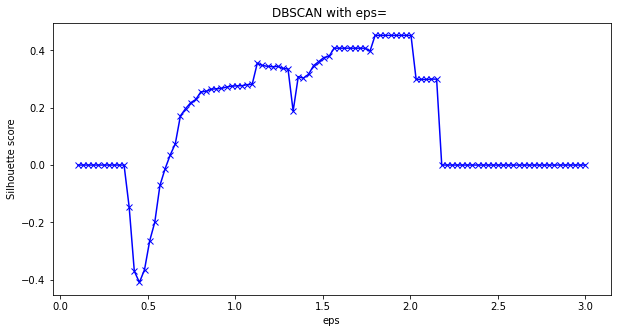

In [172]:
sil_score=[None]*100
eps=np.linspace(0.1,3,100)
for k in range(100):
    classes = cluster.DBSCAN(eps=eps[k]).fit_predict(df3)
    if len(set(classes))==1:
        sil_score[k]=0
    else:
        sil_score[k]=silhouette_score(df3,classes)
f = plt.figure(figsize=(10,5))
plt.plot(eps,sil_score , 'bx-')
plt.title("DBSCAN with eps= ")
plt.xlabel('eps')
plt.ylabel('Silhouette score')
plt.show()

Najlepsze wyniki osiągamy dla eps w okolicach 2.

Ostatnim podejściem było GMM.

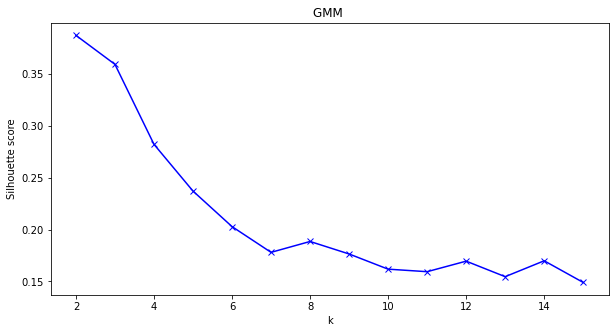

In [173]:
sil_score=[None]*14
for k in range(2,16):
    classes=mixture.GaussianMixture(n_components=k, covariance_type="full").fit_predict(df3)
    sil_score[k-2]=silhouette_score(df3,classes)
f = plt.figure(figsize=(10,5))
plt.plot(list(range(2,16)),sil_score , 'bx-')
plt.title("GMM ")
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

Widzimy, że dla k=8 osiągamy maksimum lokalne, dlatego rozważymy taką właśnie liczbę klastrów.

# Wizualizacja za pomocą TSNE

In [174]:
#kod z zajęć
def scatter(x, colors):
    palette = np.array(sns.color_palette("hls", 10))

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    #ax.axis('off')
    ax.axis('tight')

    # add labels
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txts.append(txt)

    return f, ax, sc, txts


In [175]:
tSNE = TSNE(random_state=0, verbose=1)
digits_proj = tSNE.fit_transform(df)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 589 samples in 0.005s...
[t-SNE] Computed neighbors for 589 samples in 0.032s...
[t-SNE] Computed conditional probabilities for sample 589 / 589
[t-SNE] Mean sigma: 2.083481
[t-SNE] KL divergence after 250 iterations with early exaggeration: 115.119789
[t-SNE] KL divergence after 1000 iterations: 1.725353
Wall time: 2.09 s


Odczytamy teraz prawdziwe nazwy naszych obserwacji. Podzielimy je na 2 sposoby, raz na 8 ksiąg, drugi raz na 4 różne religie. Porównamy to potem z naszymi wybranymi podziałami.

In [176]:
df_labelled = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\Wstęp do uczenia maszynowego\\Dane\\AllBooks_baseline_DTM_Labelled.csv")

In [177]:
df_labelled = df_labelled.drop(index=13).reset_index(drop=True)

In [178]:
books = df_labelled.iloc[:,0]
books

0           Buddhism_Ch1
1           Buddhism_Ch2
2           Buddhism_Ch3
3           Buddhism_Ch4
4           Buddhism_Ch5
             ...        
584    BookOfWisdom_Ch15
585    BookOfWisdom_Ch16
586    BookOfWisdom_Ch17
587    BookOfWisdom_Ch18
588    BookOfWisdom_Ch19
Name: Unnamed: 0, Length: 589, dtype: object

In [179]:
bookset = set(map(lambda x : x.partition("_")[0],books))
bookset

{'BookOfEccleasiasticus',
 'BookOfEcclesiastes',
 'BookOfProverb',
 'BookOfWisdom',
 'Buddhism',
 'TaoTeChing',
 'Upanishad',
 'YogaSutra'}

In [180]:
book_dict = {list(bookset)[i]:i for i in range(8)}
book_dict

{'BookOfWisdom': 0,
 'TaoTeChing': 1,
 'BookOfEccleasiasticus': 2,
 'Buddhism': 3,
 'BookOfProverb': 4,
 'Upanishad': 5,
 'YogaSutra': 6,
 'BookOfEcclesiastes': 7}

In [181]:
book_labels = list(map(lambda x:book_dict.get(x),list(map(lambda x : x.partition("_")[0],books))))

In [182]:
religion_dict = {list(bookset)[i]:[0,1,0,2,0,3,3,0][i] for i in range(8)}
religion_dict

{'BookOfWisdom': 0,
 'TaoTeChing': 1,
 'BookOfEccleasiasticus': 0,
 'Buddhism': 2,
 'BookOfProverb': 0,
 'Upanishad': 3,
 'YogaSutra': 3,
 'BookOfEcclesiastes': 0}

In [183]:
religion_labels = list(map(lambda x:religion_dict.get(x),list(map(lambda x : x.partition("_")[0],books))))

Tu widzimy jak prezentują się księgi na płaszczyźnie 2D.

C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\_methods.py:153: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


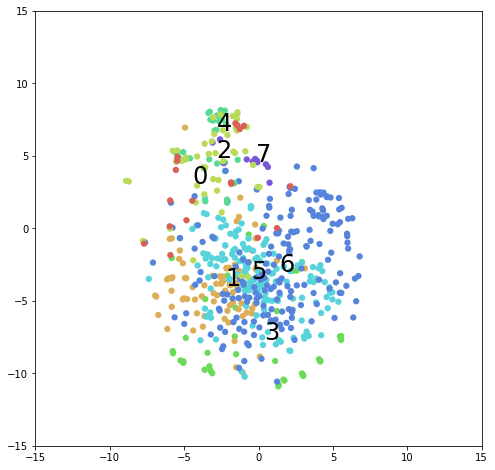

In [184]:
scatter(digits_proj, np.array(book_labels))
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.show()

Tu widzimy jak prezentują się religie na płaszczyźnie 2D.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


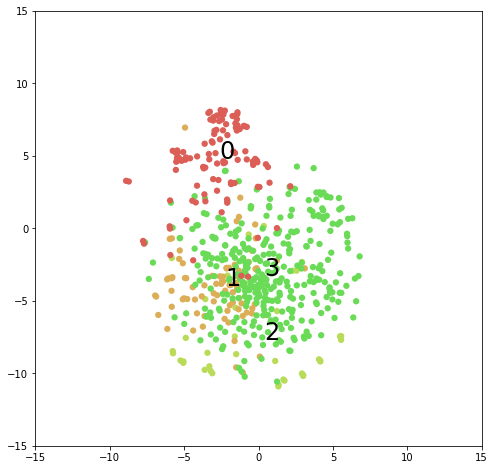

In [185]:
scatter(digits_proj, np.array(religion_labels))
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\_methods.py:153: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


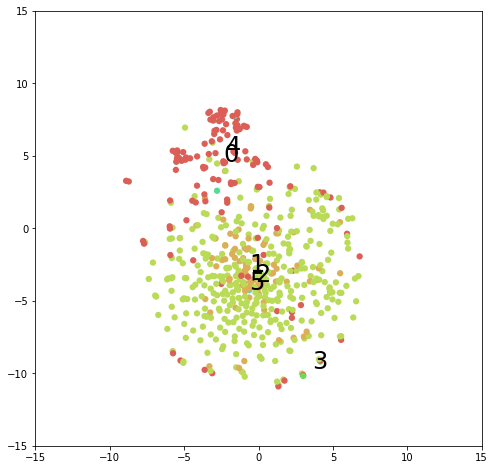

In [200]:
classes=AgglomerativeClustering(n_clusters=6,linkage="average").fit_predict(df3)
scatter(digits_proj, np.array(classes))
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.show()

Tak prezentuje się agglomerative clustering z metryką euklidesową, linkage=average i k=6. Porównamy go przy pomocy homogenity z prawdziwymi etykietami dla ksiąg i religii.

In [201]:
metrics.homogeneity_score(religion_labels, classes)

0.3800077163679837

In [202]:
metrics.homogeneity_score(book_labels, classes)

0.29428131990137685

Nie są to wysokie wyniki, może to być spowodowane tym, że wybraliśmy inną liczbę klas niż 4 lub 8.

C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\_methods.py:153: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


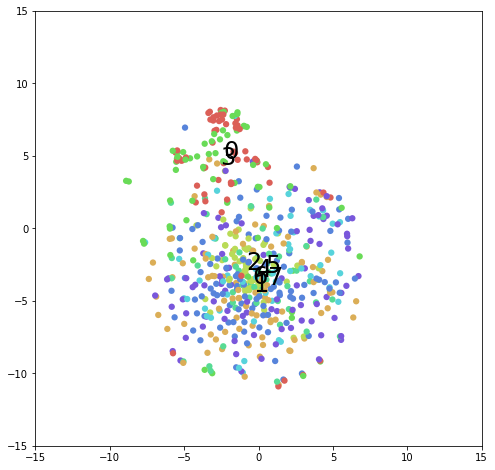

In [203]:
classes=mixture.GaussianMixture(n_components=8, covariance_type="full").fit_predict(df3)
scatter(digits_proj, np.array(classes))
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.show()

Tak poradził sobie GMM z k=8, zobaczymy jak wypada to pod względem homogenity.

In [204]:
metrics.homogeneity_score(religion_labels, classes)

0.39773321943016227

In [205]:
metrics.homogeneity_score(book_labels, classes)

0.3193803236898751

Tutaj wyniki znów nie są wysokie, lecz o dziwo mamy lepsze homogenity dla religii niż dla ksiąg.

C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\_methods.py:153: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values

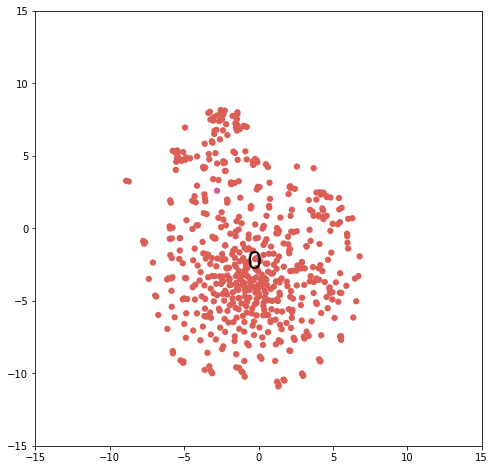

In [206]:
classes = cluster.DBSCAN(eps=2).fit_predict(df3)
scatter(digits_proj, np.array(classes))
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.show()

Widzimy, że DBSCAN wyłapał tutaj tylko jeden duży klaster i ewentualne pojedyncze klasy odstające. Nie ma sensu tutaj nawet rozważać homogenity.

C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\_methods.py:153: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


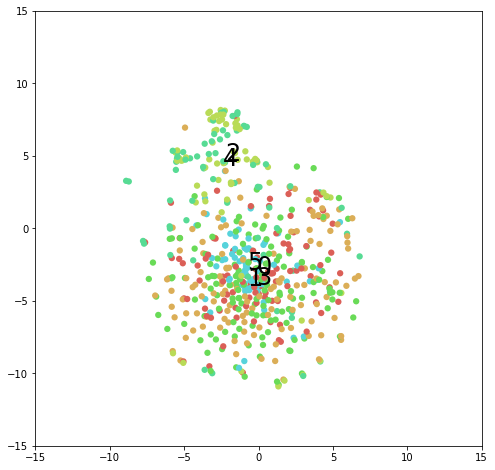

In [207]:
classes = KMeans(n_clusters=6,random_state=0).fit_predict(df3)
scatter(digits_proj, np.array(classes))
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.show()

Tak wygląda podział przewidziany przez KMeans.

In [208]:
metrics.homogeneity_score(religion_labels, classes)

0.390362823637356

In [209]:
metrics.homogeneity_score(book_labels, classes)

0.30511221551094003

Daje to bardzo podobne wyniki jak poprzednie modele.

C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\_methods.py:153: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


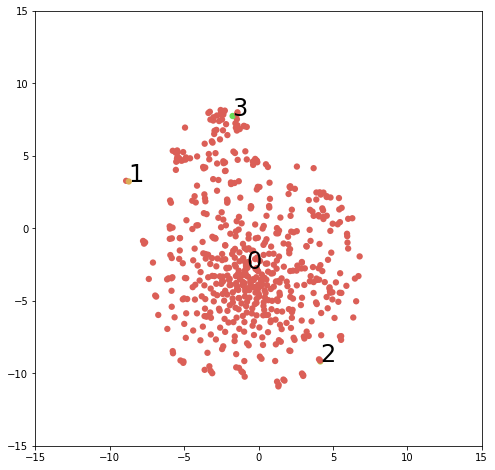

In [210]:
classes=AgglomerativeClustering(n_clusters=4,linkage="single",affinity="precomputed").fit_predict(pdist2)
scatter(digits_proj, np.array(classes))
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.show()

Nasza własna metryka pomimo dobrego silhouette daje bardzo słabe wyniki dla naszego zbioru danych. Nie potrzebujemy liczyć homogenity, żeby to zobaczyć.

# Wnioski

Najlepsze rezultaty naszym zdanie dają metody użyte na przekształconej ramce danych df3:
+ KMeans(n_clusters=6,random_state=0)
+ GaussianMixture(n_components=8, covariance_type="full")
+ AgglomerativeClustering(n_clusters=6,linkage="average")